# 🪁Kite Detection using 🚀 YOLO V8 model.

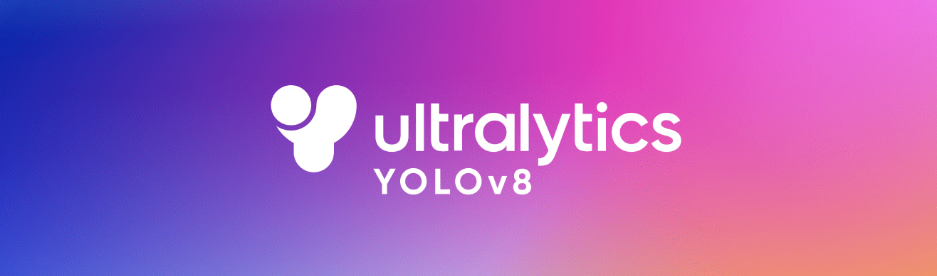

## Install Ultralytics Library

In [ ]:
# Pip install method (recommended)
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.0/249.0 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.1 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=5c02cb489c94ff75f489356bba3fc503123a63ebc08ab9a94ed93924b4909050
  Stored in directory: /root/.cache/pip/wheels/b1/a3/c2/6df046c09459b73cc9bb6c4401b0be6c47048baf9a1617c485
Succes

## Import the Library and run checks

In [ ]:
# import matplotlib.pyplot as plt

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.0/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the custom Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY_TO_DATASET_FROM_ROBOFLOW")
project = rf.workspace("MY-WORKSPACE").project("kite-detector")
dataset = project.version(5).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 8.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=cc1d9403a3742097448cdd16ec2e8f90d89e5ae0c5bd6510adfa80b23ece0792
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to kite-detector-5 in yolov8:: 100%|██████████| 2868/2868 [00:01<00:00, 2483.21it/s]


## Run scripts to load model and training on dataset

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8s.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='/content/kite-detector-5/data.yaml', epochs=300, imgsz = 320, cache = True)  # train the model

  0%|          | 0.00/21.5M [00:00<?, ?B/s]


Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/kite-detector-5/data.yaml, epochs=300, patience=50, batch=16, imgsz=320, save=True, cache=True, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=True, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

## **Best model after training :-**

* Box Precision ==> 76.6%

* Recall ==> 76.8%

* mAP50 ==> 79.1%

* mAP50-95 ==> 48.4% 

## Testing on Test Images

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/kite detector model/yolov8/runs2/detect/train/weights/best.pt" conf=0.25 source='/content/kite-detector-5/test/images/'

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/88 /content/kite-detector-5/test/images/17kite_jpg.rf.e1f4cd937309a4e76629cd9cd04aa648.jpg: 640x640 3 kites, 17.1ms
image 2/88 /content/kite-detector-5/test/images/20230107_173406_mp4-113_jpg.rf.f8c135f36d311edb908202957ecc1d0e.jpg: 640x640 1 kite, 17.2ms
image 3/88 /content/kite-detector-5/test/images/20230107_173406_mp4-124_jpg.rf.a7c36bbbc5b3159dffb8ef476bfa41a9.jpg: 640x640 1 kite, 17.1ms
image 4/88 /content/kite-detector-5/test/images/20230107_173406_mp4-13_jpg.rf.3641ec8d28f14cefdf4d821ed9290437.jpg: 640x640 17.1ms
image 5/88 /content/kite-detector-5/test/images/20230107_173406_mp4-147_jpg.rf.d93344cd33719ede38ea2f58e0aaf2b2.jpg: 640x640 1 kite, 17.0ms
image 6/88 /content/kite-detector-5/test/images/20230107_173406_mp4-20_jpg.rf.61cb0df1783346f7c75111ea9e7adb44.jpg: 640x640 1 kite, 17.0ms
image 7/8

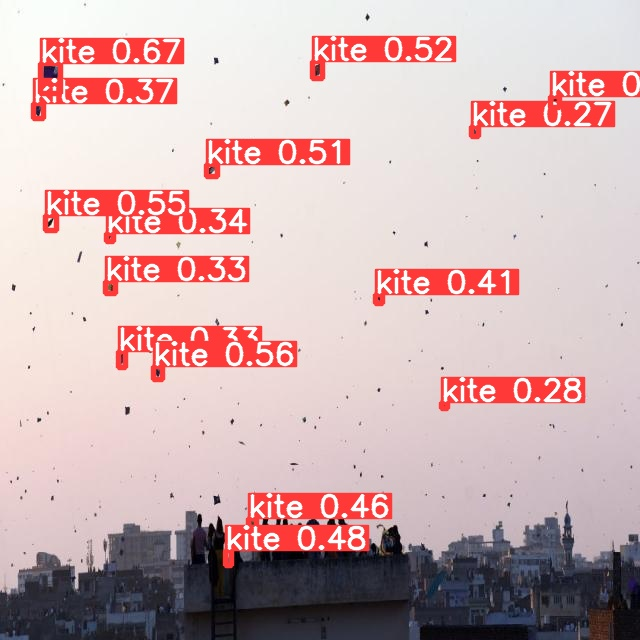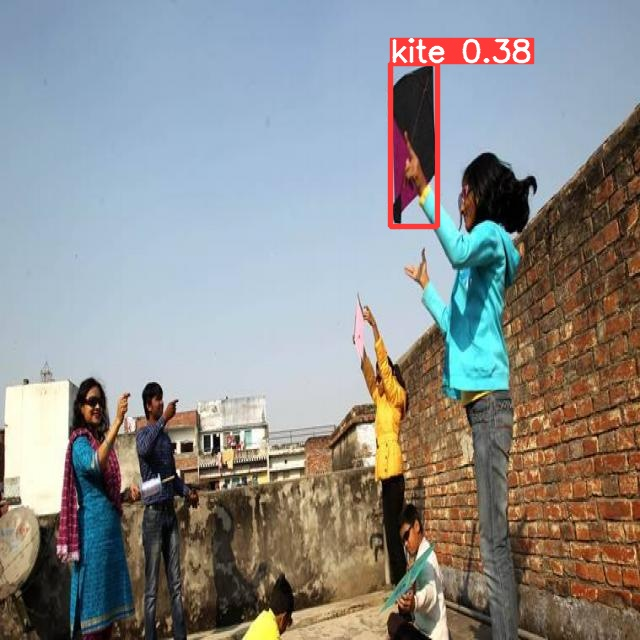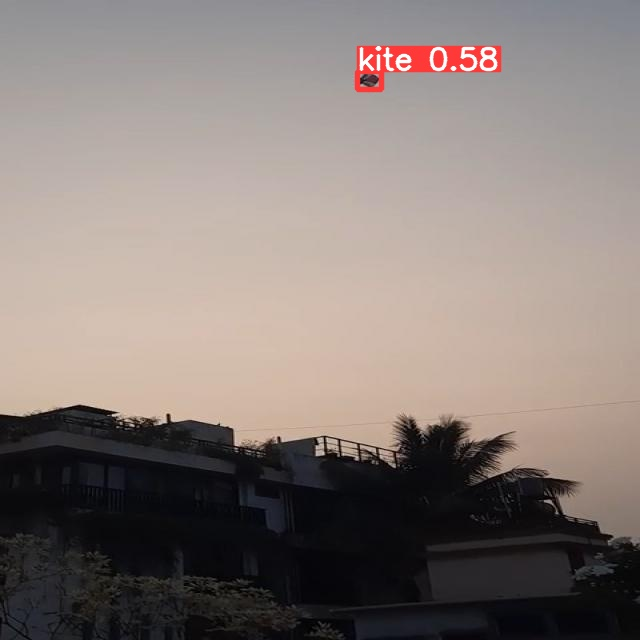

## Testing on Videos

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/kite detector model/yolov8/runs2/detect/train/weights/best.pt" conf=0.25 source='/content/drive/MyDrive/yolov5with_video/VID-20190115-WA0056.mp4'

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/710) /content/drive/MyDrive/yolov5with_video/VID-20190115-WA0056.mp4: 352x640 1 kite, 16.1ms
video 1/1 (2/710) /content/drive/MyDrive/yolov5with_video/VID-20190115-WA0056.mp4: 352x640 1 kite, 11.5ms
video 1/1 (3/710) /content/drive/MyDrive/yolov5with_video/VID-20190115-WA0056.mp4: 352x640 1 kite, 11.5ms
video 1/1 (4/710) /content/drive/MyDrive/yolov5with_video/VID-20190115-WA0056.mp4: 352x640 1 kite, 11.5ms
video 1/1 (5/710) /content/drive/MyDrive/yolov5with_video/VID-20190115-WA0056.mp4: 352x640 2 kites, 11.5ms
video 1/1 (6/710) /content/drive/MyDrive/yolov5with_video/VID-20190115-WA0056.mp4: 352x640 2 kites, 12.0ms
video 1/1 (7/710) /content/drive/MyDrive/yolov5with_video/VID-20190115-WA0056.mp4: 352x640 2 kites, 11.3ms
video 1/1 (8/710) /content/drive/MyDrive/yolov5with_video/VID-20190115-WA0056.

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/kite detector model/yolov8/runs2/detect/train/weights/best.pt" conf=0.25 source='/content/20230107_174719.mp4'

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/626) /content/20230107_174719.mp4: 640x384 16.5ms
video 1/1 (2/626) /content/20230107_174719.mp4: 640x384 15.0ms
video 1/1 (3/626) /content/20230107_174719.mp4: 640x384 15.0ms
video 1/1 (4/626) /content/20230107_174719.mp4: 640x384 15.0ms
video 1/1 (5/626) /content/20230107_174719.mp4: 640x384 15.0ms
video 1/1 (6/626) /content/20230107_174719.mp4: 640x384 15.0ms
video 1/1 (7/626) /content/20230107_174719.mp4: 640x384 15.0ms
video 1/1 (8/626) /content/20230107_174719.mp4: 640x384 15.0ms
video 1/1 (9/626) /content/20230107_174719.mp4: 640x384 15.0ms
video 1/1 (10/626) /content/20230107_174719.mp4: 640x384 15.0ms
video 1/1 (11/626) /content/20230107_174719.mp4: 640x384 14.8ms
video 1/1 (12/626) /content/20230107_174719.mp4: 640x384 9.4ms
video 1/1 (13/626) /content/20230107_174719.mp4: 640x384 9.4ms
vi

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/kite detector model/yolov8/runs2/detect/train/weights/best.pt" conf=0.25 source='/content/20230107_174546.mp4'

Ultralytics YOLOv8.0.5 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/1036) /content/20230107_174546.mp4: 640x384 17.6ms
video 1/1 (2/1036) /content/20230107_174546.mp4: 640x384 15.0ms
video 1/1 (3/1036) /content/20230107_174546.mp4: 640x384 15.0ms
video 1/1 (4/1036) /content/20230107_174546.mp4: 640x384 15.0ms
video 1/1 (5/1036) /content/20230107_174546.mp4: 640x384 15.0ms
video 1/1 (6/1036) /content/20230107_174546.mp4: 640x384 15.0ms
video 1/1 (7/1036) /content/20230107_174546.mp4: 640x384 15.0ms
video 1/1 (8/1036) /content/20230107_174546.mp4: 640x384 15.0ms
video 1/1 (9/1036) /content/20230107_174546.mp4: 640x384 15.0ms
video 1/1 (10/1036) /content/20230107_174546.mp4: 640x384 15.0ms
video 1/1 (11/1036) /content/20230107_174546.mp4: 640x384 15.0ms
video 1/1 (12/1036) /content/20230107_174546.mp4: 640x384 15.0ms
video 1/1 (13/1036) /content/20230107_174546.mp4: 64